### Heart failure clinical records

* Notebook [DSHI_Lab3and4_Michel_Laji.ipynb](https://github.com/salgo60/Pandas_DSHI/blob/main/DSHI_Lab3and4_Michel_Laji.ipynb)


#student_name =   "Michel Laji"
#student_id =     "mila1958"
#student_background =  "medical"

In [1]:
# Numeric analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)


In [2]:
df_Kajsa = pd.read_csv("Kajsa.csv")
df_Kajsa.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#data_blobs_X, data_blobs_y = make_blobs(n_samples=100, n_features=2,
#                                        cluster_std=3,  # Induce some noise on the blobs
#                                        centers=2,  # Two classes
#                                        random_state=RANDOM_SEED)

In [4]:
#data_blobs_X

In [5]:
df_Kajsa.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df_Kajsa.groupby(by= ["sex","ejection_fraction","platelets"]).size()

sex  ejection_fraction  platelets
0    15                 213000.0     1
     17                 271000.0     1
     20                 279000.0     1
                        327000.0     1
                        418000.0     1
                                    ..
1    60                 337000.0     1
                        368000.0     1
                        377000.0     1
                        454000.0     1
     62                 147000.0     1
Length: 280, dtype: int64

In [13]:
df_Kajsa["ejection_fraction"]

0      20
1      38
2      20
3      20
4      20
       ..
294    38
295    38
296    60
297    38
298    45
Name: ejection_fraction, Length: 299, dtype: int64

In [12]:
df_Kajsa["platelets"]

0      265000.00
1      263358.03
2      162000.00
3      210000.00
4      327000.00
         ...    
294    155000.00
295    270000.00
296    742000.00
297    140000.00
298    395000.00
Name: platelets, Length: 299, dtype: float64

In [14]:
# Visualizing some samples in a dataframe for clarification
df_Kajsa_testdata = pd.DataFrame({
                        "ejection_fraction": df_Kajsa["ejection_fraction"],
                        "platelets": df_Kajsa["platelets"],
                        "sex": df_Kajsa["sex"]
                        })

# Show random 10 samples from the data
df_Kajsa_testdata.sample(10)

,ejection_fraction,platelets,sex
259,50,308000.00,1
24,30,263358.03,0
148,30,225000.00,1
195,45,223000.00,1
161,35,174000.00,1
156,35,277000.00,0
229,25,274000.00,0
257,38,253000.00,1
149,35,228000.00,1
62,35,254000.00,1


In [16]:
#df_Kajsa_testdata["sex"] = df_Kajsa_testdata["sex"].replace({"Male": 1, "Female": 0})

In [25]:
#df_Kajsa_testdata.sex

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

In [30]:
def visualize_dataset_with_target_class(X, y, title=""):
    plt.scatter(x=df_Kajsa_testdata.loc[X == 1, "platelets"], y=df_Kajsa_testdata.loc[X == 1, "ejection_fraction"], c="blue", label="Male")
    plt.scatter(x=df_Kajsa_testdata.loc[X == 0, "platelets"], y=df_Kajsa_testdata.loc[X == 0, "ejection_fraction"], c="red", label="Female")
    plt.xlabel("Platelets")
    plt.ylabel("Ejection Fraction")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    return plt.show()

In [33]:
#df_Kajsa_testdata["sex"]
#df_Kajsa_testdata["platelets"]

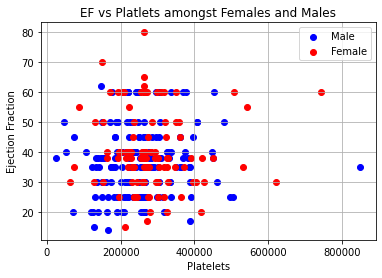

In [32]:
visualize_dataset_with_target_class(df_Kajsa_testdata["sex"], df_Kajsa_testdata["platelets"], title="EF vs Platlets amongst Females and Males")

In [ ]:
df_blobs.isnull().sum()

In [ ]:
np.random.seed(42)
N_SAMPLES = 100
data_blobs_X = np.random.normal(size=(N_SAMPLES, 2))
data_blobs_y = np.random.binomial(n=1, p=0.5, size=N_SAMPLES)
data_blobs_y[data_blobs_y == 0] = -1

def visualize_dataset_with_target_class(X, y, title=""):
    male_X = X[y == 1]
    female_X = X[y == -1]
    
    plt.scatter(x=male_X[:,1], y=male_X[:,0], c="blue", label="Male")
    plt.scatter(x=female_X[:,1], y=female_X[:,0], c="red", label="Female")
    
    plt.xlabel("Platelets")
    plt.ylabel("Ejection Fraction")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    return plt.show()
scaler = StandardScaler()
scaler.fit(data_blobs_X)
data_blobs_X_scaled = scaler.transform(data_blobs_X)
df_blobs_scaled = pd.DataFrame(data_blobs_X_scaled, columns=["ejection_fraction", "platelets"])
df_blobs_scaled["sex"] = data_blobs_y

X_train, X_test, y_train, y_test = train_test_split(df_blobs_scaled.drop("sex", axis=1), 
                                                    df_blobs_scaled["sex"], 
                                                    test_size=0.2, 
                                                    random_state=42)

visualize_dataset_with_target_class(X_train.values, y_train.values, title="Training set with original class labels")

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
dblobs_y_predicted = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of decision tree classifier on test data:", accuracy, "and the class labels in the test set are:", dblobs_y_predicted)

In [ ]:
def visualize_and_compare_classifications(X, real_y, predicted_y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        predicted_y: (np.array[N,1]) - Predicted class labels from X
    Returns:
        A plot with two axes showing the real and the predicted labels
    """

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    
    # First plot contains real class labels
    ax = axes[0]
    male_X = X[real_y == 1]
    female_X = X[real_y == -1]
    ax.scatter(x=male_X[:,1], y=male_X[:,0], c="blue", label="Male")
    ax.scatter(x=female_X[:,1], y=female_X[:,0], c="red", label="Female")
    ax.set(xlabel="Platelets", ylabel="Ejection Fraction", title="Real labels")
    ax.grid(True)
    ax.legend()

    # Second plot contains predicted class labels
    ax = axes[1]
    male_X = X[predicted_y == 1]
    female_X = X[predicted_y == -1]
    ax.scatter(x=male_X[:,1], y=male_X[:,0], c="blue", label="Male")
    ax.scatter(x=female_X[:,1], y=female_X[:,0], c="red", label="Female")
    ax.set(xlabel="Platelets", ylabel="Ejection Fraction", title="Predicted labels")
    ax.grid(True)
    ax.legend()

    if title != "":
        plt.suptitle(title)

    return plt.show()


In [ ]:
visualize_and_compare_classifications(X_test.values, y_test.values, y_pred, title="Real and predicted classes for the test")

In [ ]:
def visualize_and_compare_decision_boundaries(X, real_y, classifier, title="", step=0.005):
    """
    Function based on the example from 
    https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        classifier: (sklearn-object) - Object that classifies the data
    Returns:
        A plot with two axes showing the decision boundaries
    """
    real_y = np.where(real_y == 1, -1, 1)
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # We are creating a 2D grid of test data to be able to show the decision boundaries
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    # And we apply the classifier to each sample in the 2D grid to see what would the prediction
    # be at each specific point of the space
    Z = dt_clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plot contains real class labels and 
    # the decision boundary created by the classifier
    fig, ax = plt.subplots(figsize=(8,6))
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(x = X[:,0], y = X[:,1], c=real_y, s=30, edgecolor="k", label="True class labels")
    ax.set(xlabel="Platelets", ylabel="Ejection Fraction")
    ax.grid(True); ax.legend()

    if title == "":
        plt.suptitle("True class labels and predicted decision boundary")
    else:
        plt.suptitle(title)

    return plt.show()

In [ ]:
visualize_and_compare_decision_boundaries(X_test.values, y_test.values, y_pred)

In [ ]:
plot_tree(dt_clf)

In [ ]:
scaler = MinMaxScaler()

data_norm_blobs_X = scaler.fit_transform(data_blobs_X)

dblobs_norm_X_train, dblobs_norm_X_test, dblobs_y_train, dblobs_y_test = train_test_split(data_norm_blobs_X, 
                                                                                data_blobs_y,                                                                               test_size=0.3,
                                                                                random_state=RANDOM_SEED)
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(dblobs_norm_X_train, dblobs_y_train)
dblobs_y_predicted = knn_classifier.predict(dblobs_norm_X_test)

In [ ]:
visualize_and_compare_decision_boundaries(dblobs_norm_X_test, dblobs_y_test, knn_classifier)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=3, criterion="entropy")
rf_classifier.fit(X_train, y_train)
y_predicted = rf_classifier.predict(X_test)
print("According to the RF classifier, the class labels in the test set are: ", y_predicted)


In [ ]:
visualize_and_compare_decision_boundaries(X_test.values, y_test, rf_classifier)